In [1]:
import matplotlib.pyplot as plt
from Objects.Simulation import Simulation
import numpy as np
import pickle
import pandas as pd
%pylab
%matplotlib inline

# Create cycler object. Use any styling from above you please
monochromeWithMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [ '.' ,'^']))
monochromeNoMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [',']))
monochrome = monochromeNoMarker.concat(monochromeWithMarker)
# Print examples of output from cycler object. 
# A cycler object, when called, returns a `iter.cycle` object that iterates over items indefinitely
print("number of items in monochrome:", len(monochrome))
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.prop_cycle'] = monochrome
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (12,5)
mpl.rcParams['figure.dpi']= 300
MARKEREVERY = 50

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
number of items in monochrome: 12


In [2]:
# Create cycler object. Use any styling from above you please
monochromeWithMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [ '.' ,'^']))
monochromeNoMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [',']))
monochrome = monochromeNoMarker.concat(monochromeWithMarker)
# Print examples of output from cycler object. 
# A cycler object, when called, returns a `iter.cycle` object that iterates over items indefinitely
print("number of items in monochrome:", len(monochrome))
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.prop_cycle'] = monochrome
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (12,5)
mpl.rcParams['figure.dpi']= 300
MARKEREVERY = 50

number of items in monochrome: 12


In [3]:
subFolder = "SG1/"
av_avg_delay = pd.read_csv(subFolder+'SG1_av_avg_delay.csv',index_col=0)* 1000
av_max_delay = pd.read_csv(subFolder+'SG1_av_max_delay.csv',index_col=0)* 1000
av_vdr = pd.read_csv(subFolder+'SG1_av_vdr.csv',index_col=0)
cav_avg_delay = pd.read_csv(subFolder+'SG1_cav_avg_delay.csv',index_col=0)* 1000
cav_max_delay = pd.read_csv(subFolder+'SG1_cav_max_delay.csv',index_col=0)* 1000
cav_vdr = pd.read_csv(subFolder+'SG1_cav_vdr.csv',index_col=0)
xlabel = "maximum acceleration"
ylabel="maximum deceleration"


In [4]:
av_avg_delay

,1.34,1.3,1.26,1.22,1.18,1.14,1.1,1.06,1.02,0.98,0.94,0.9,0.86,0.82,0.78,0.74,0.7,0.66,0.62,0.58
-1.34,92.419633,90.388828,92.470312,94.708514,97.114751,99.701143,98.237190,101.190967,104.375390,107.808383,107.096511,111.075657,115.381807,115.511057,120.572710,126.076930,127.464233,134.046243,141.250181,144.581908
-1.30,91.788931,93.759244,91.831762,94.055805,96.448999,99.023630,97.564011,100.506521,103.681373,107.106678,106.397732,110.370653,114.673025,114.805311,119.865751,125.372011,131.368064,133.352128,140.566914,143.907057
-1.26,91.135474,93.090639,91.169850,93.378565,95.757575,98.319355,96.864496,99.794666,102.958958,106.375679,105.669986,109.635863,113.933768,118.592764,119.128051,124.635961,130.637435,132.627016,139.852693,147.782421
-1.22,90.458049,92.396806,90.483292,92.675384,95.038945,97.586656,100.332102,99.053650,102.206269,105.613398,104.911313,108.869217,113.161867,117.818594,118.357384,123.866480,129.873117,131.868580,139.105159,147.051229
-1.18,89.755371,91.676331,93.743990,91.944756,94.291460,96.823742,99.555406,98.281576,101.421270,104.817662,108.491257,108.068450,112.354944,117.008670,117.551294,123.061030,129.072506,131.074249,138.321700,146.284382
-1.14,89.026081,90.927714,92.977003,91.185077,93.513354,96.028682,98.745109,97.476386,100.601741,103.986100,107.650221,107.231073,111.510377,116.160253,116.707075,122.216804,128.232717,130.241171,137.499412,145.478953
-1.10,88.268746,90.149362,92.178574,94.367471,92.702732,95.199393,97.898939,100.816717,99.745266,103.116114,106.769433,106.354356,110.625277,115.270314,115.821729,121.330686,127.350538,129.366170,136.635056,144.631672
-1.06,87.481855,89.339592,91.346828,93.514959,91.857567,94.333633,97.014437,99.915620,98.849211,102.204860,105.845850,105.435288,109.696451,114.335497,119.386638,120.399209,126.422388,128.445707,135.725012,143.738875
-1.02,86.663815,88.496623,90.479772,92.625008,94.944665,93.428991,96.088941,98.971516,97.910704,101.249221,104.876120,108.815134,108.720365,113.352067,118.400275,119.418507,125.444260,132.044881,134.765219,142.796443
-0.98,89.542288,87.618580,89.575299,91.695251,93.991155,92.482873,95.119568,97.981230,101.085366,100.245776,103.856544,107.783024,107.693097,112.315867,117.359857,118.384251,124.411656,131.020195,133.751101,141.799723


In [5]:
human_avg_delay,human_max_delay,human_vdr = 0.12942767311532427, 0.2537603430021795, 1740.0
human_avg_delay *= 1000
human_max_delay *= 1000

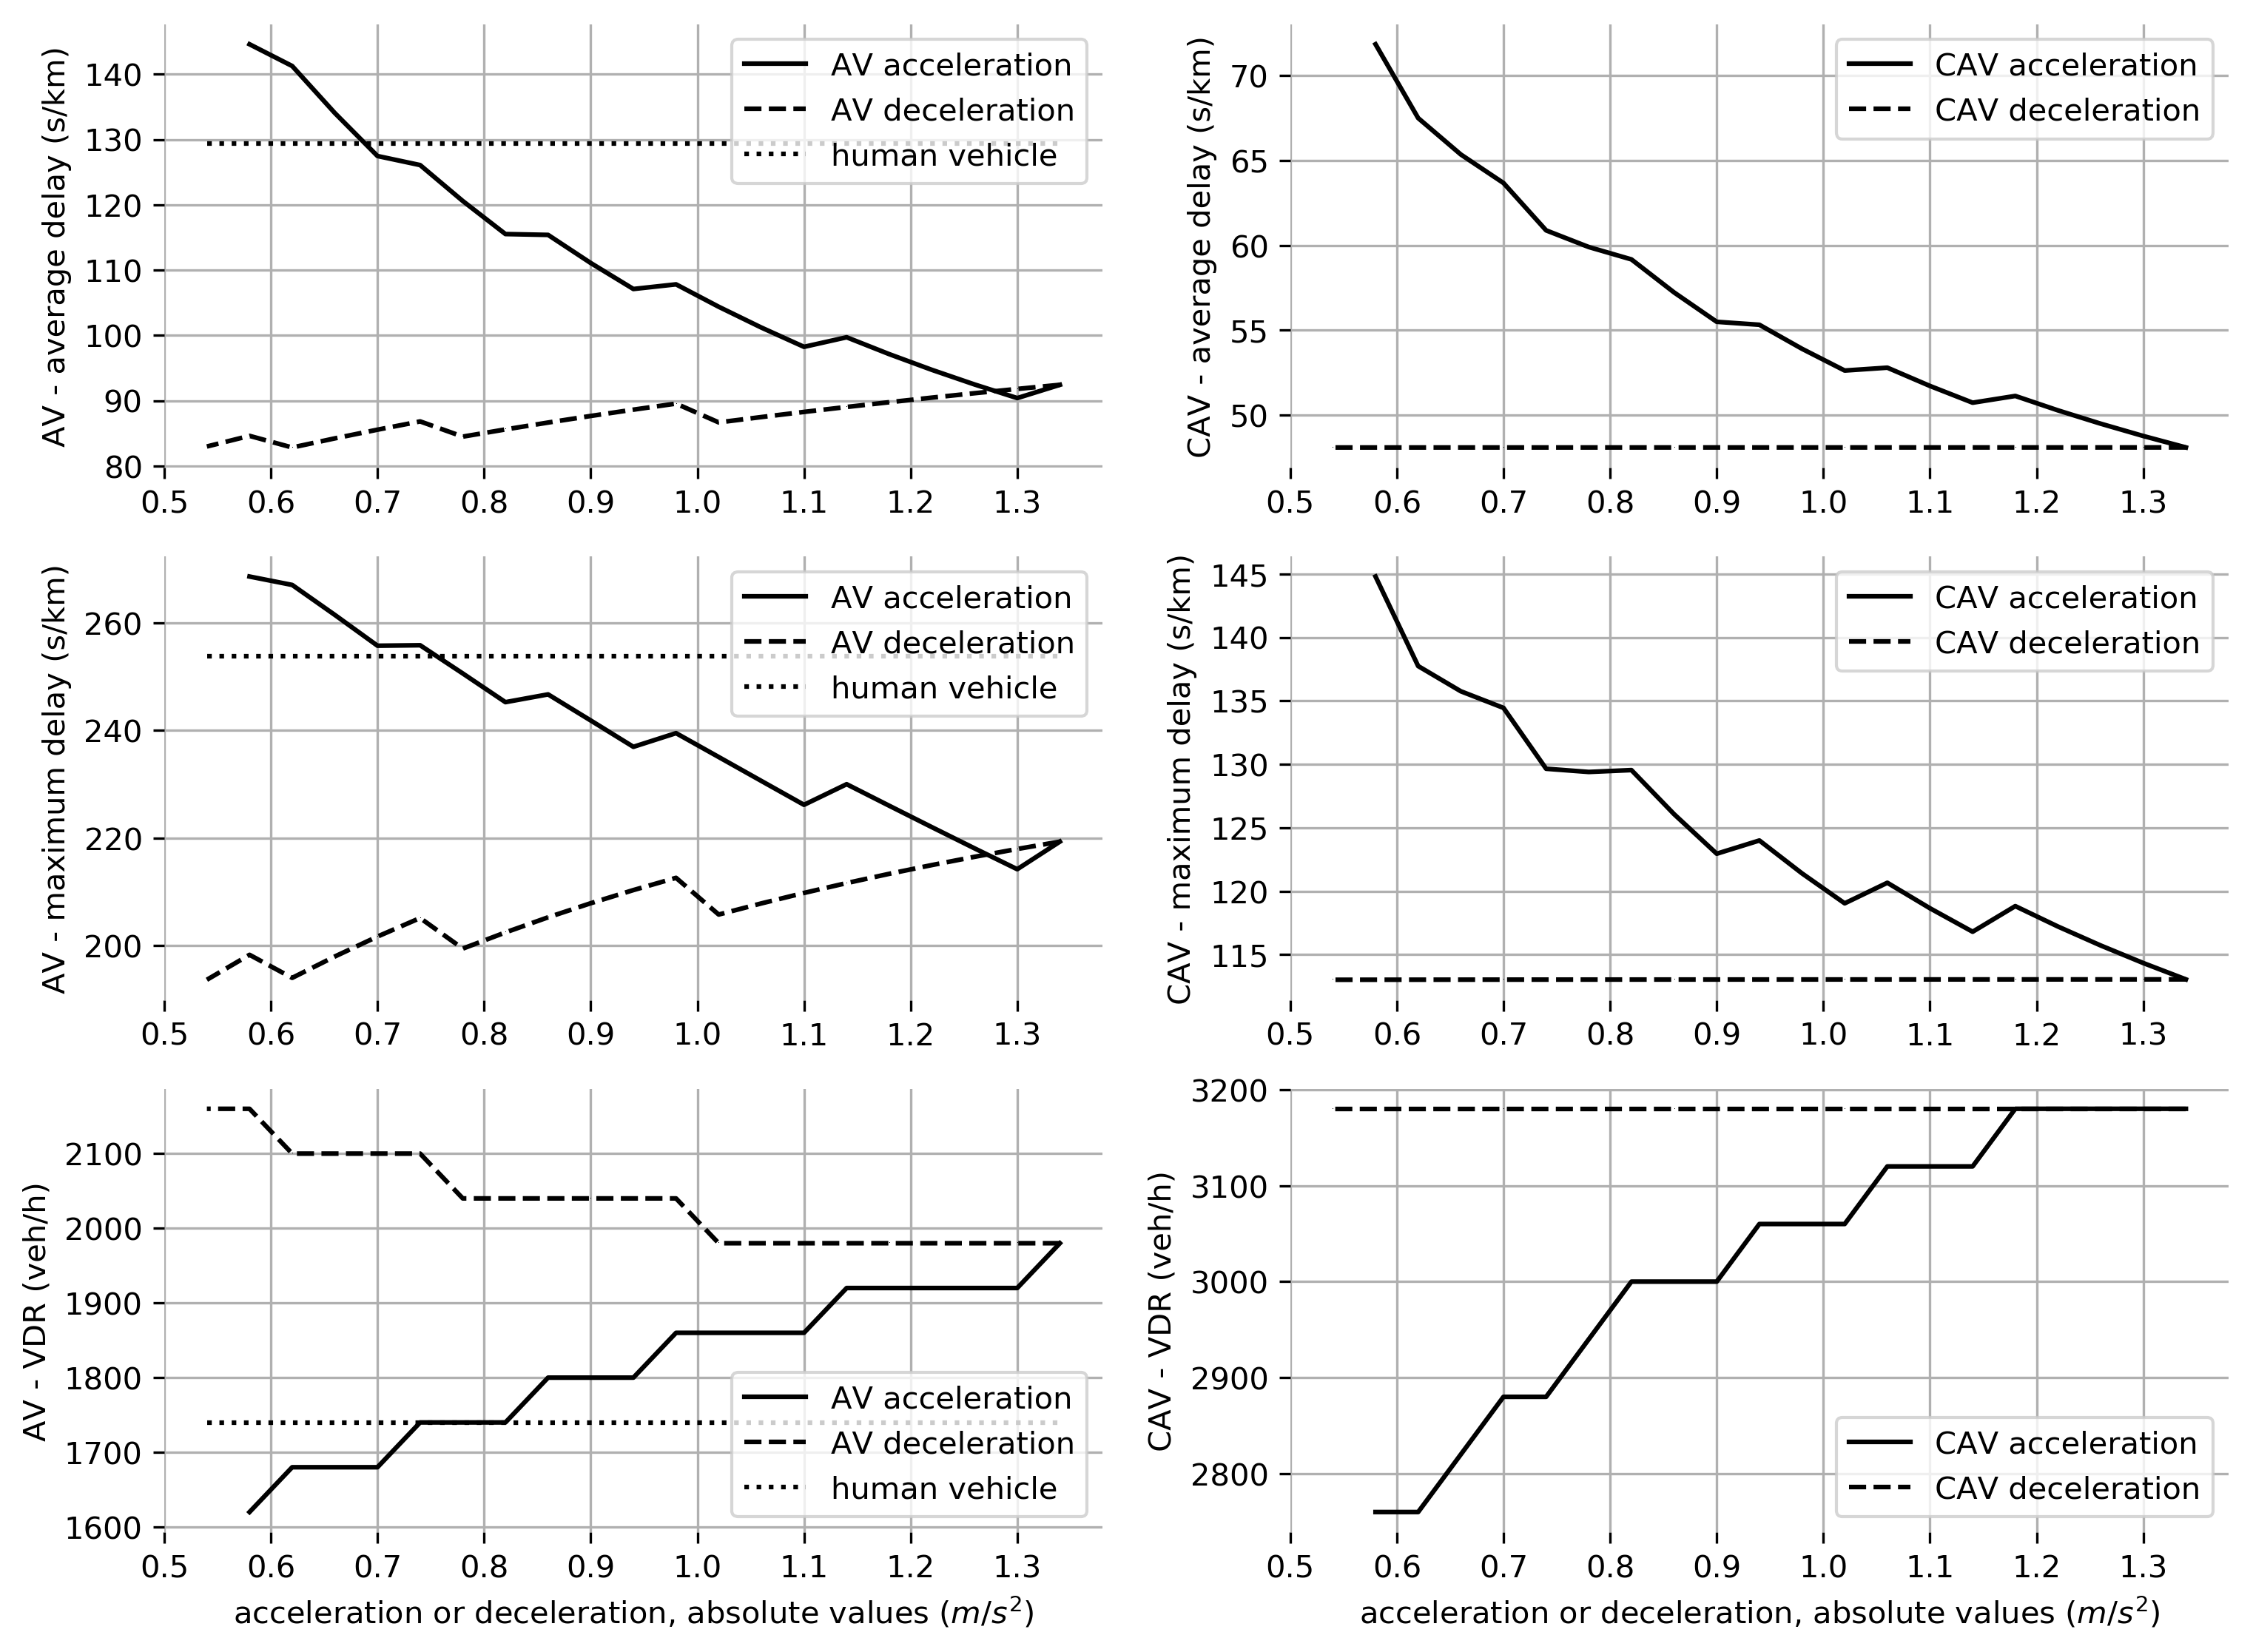

In [6]:
def get_xs_ys(df):
    sample_delay_fix_dec = df.values[0]
    sample_delay_fix_acc = np.array(df['1.34'])
    y1 = sample_delay_fix_dec
    y2 = sample_delay_fix_acc
    x1 = np.float64(df.columns)
    x2 = np.float64(np.abs(df.index))
    return  x1,y1,x2,y2

plt.figure(figsize=(12,9))
plt.subplot(3,2,1)
x1,y1,x2,y2 = get_xs_ys(av_avg_delay)
# plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.ylabel("AV - average delay (s/km)")
plt.plot(x1, y1, label = "AV acceleration")
plt.plot(x2, y2, label = "AV deceleration")
plt.hlines(y=human_avg_delay,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.legend(title='')
plt.subplot(3,2,2)
x1,y1,x2,y2 = get_xs_ys(cav_avg_delay)
# plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.plot(x1, y1, label = "CAV acceleration")
plt.plot(x2, y2, label = "CAV deceleration")
# plt.hlines(y=human_avg_delay,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.ylabel("CAV - average delay (s/km)")
plt.legend(title='')
plt.subplot(3,2,3)
x1,y1,x2,y2 = get_xs_ys(av_max_delay)
# plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.ylabel("AV - maximum delay (s/km)")
plt.plot(x1, y1, label = "AV acceleration")
plt.plot(x2, y2, label = "AV deceleration")
plt.hlines(y=human_max_delay,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.legend(title='')
plt.subplot(3,2,4)
x1,y1,x2,y2 = get_xs_ys(cav_max_delay)
# plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.plot(x1, y1, label = "CAV acceleration")
plt.plot(x2, y2, label = "CAV deceleration")
# plt.hlines(y=human_max_delay,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.ylabel("CAV - maximum delay (s/km)")
plt.legend(title='')
plt.subplot(3,2,5)
x1,y1,x2,y2 = get_xs_ys(av_vdr)
plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.ylabel("AV - VDR (veh/h)")
plt.plot(x1, y1, label = "AV acceleration")
plt.plot(x2, y2, label = "AV deceleration")
plt.hlines(y=human_vdr,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.legend(title='')
plt.subplot(3,2,6)
x1,y1,x2,y2 = get_xs_ys(cav_vdr)
plt.xlabel("acceleration or deceleration, absolute values "+ r"$(m/s^{2})$")
plt.plot(x1, y1, label = "CAV acceleration")
plt.plot(x2, y2, label = "CAV deceleration")
# plt.hlines(y=human_vdr,xmax=1.34, xmin=0.54,label = "human vehicle", linestyles='dotted')
plt.ylabel("CAV - VDR (veh/h)")
plt.legend(title='')

In [7]:
def cal_max_min_two_df(df1,df2):
    df1max = np.max(np.max(df1))
    df1min = np.min(np.min(df1))
    df2max = np.max(np.max(df2))
    df2min = np.min(np.min(df2))
    return max(df1max,df2max), min(df1min,df2min)
import seaborn as sns
sns.set()

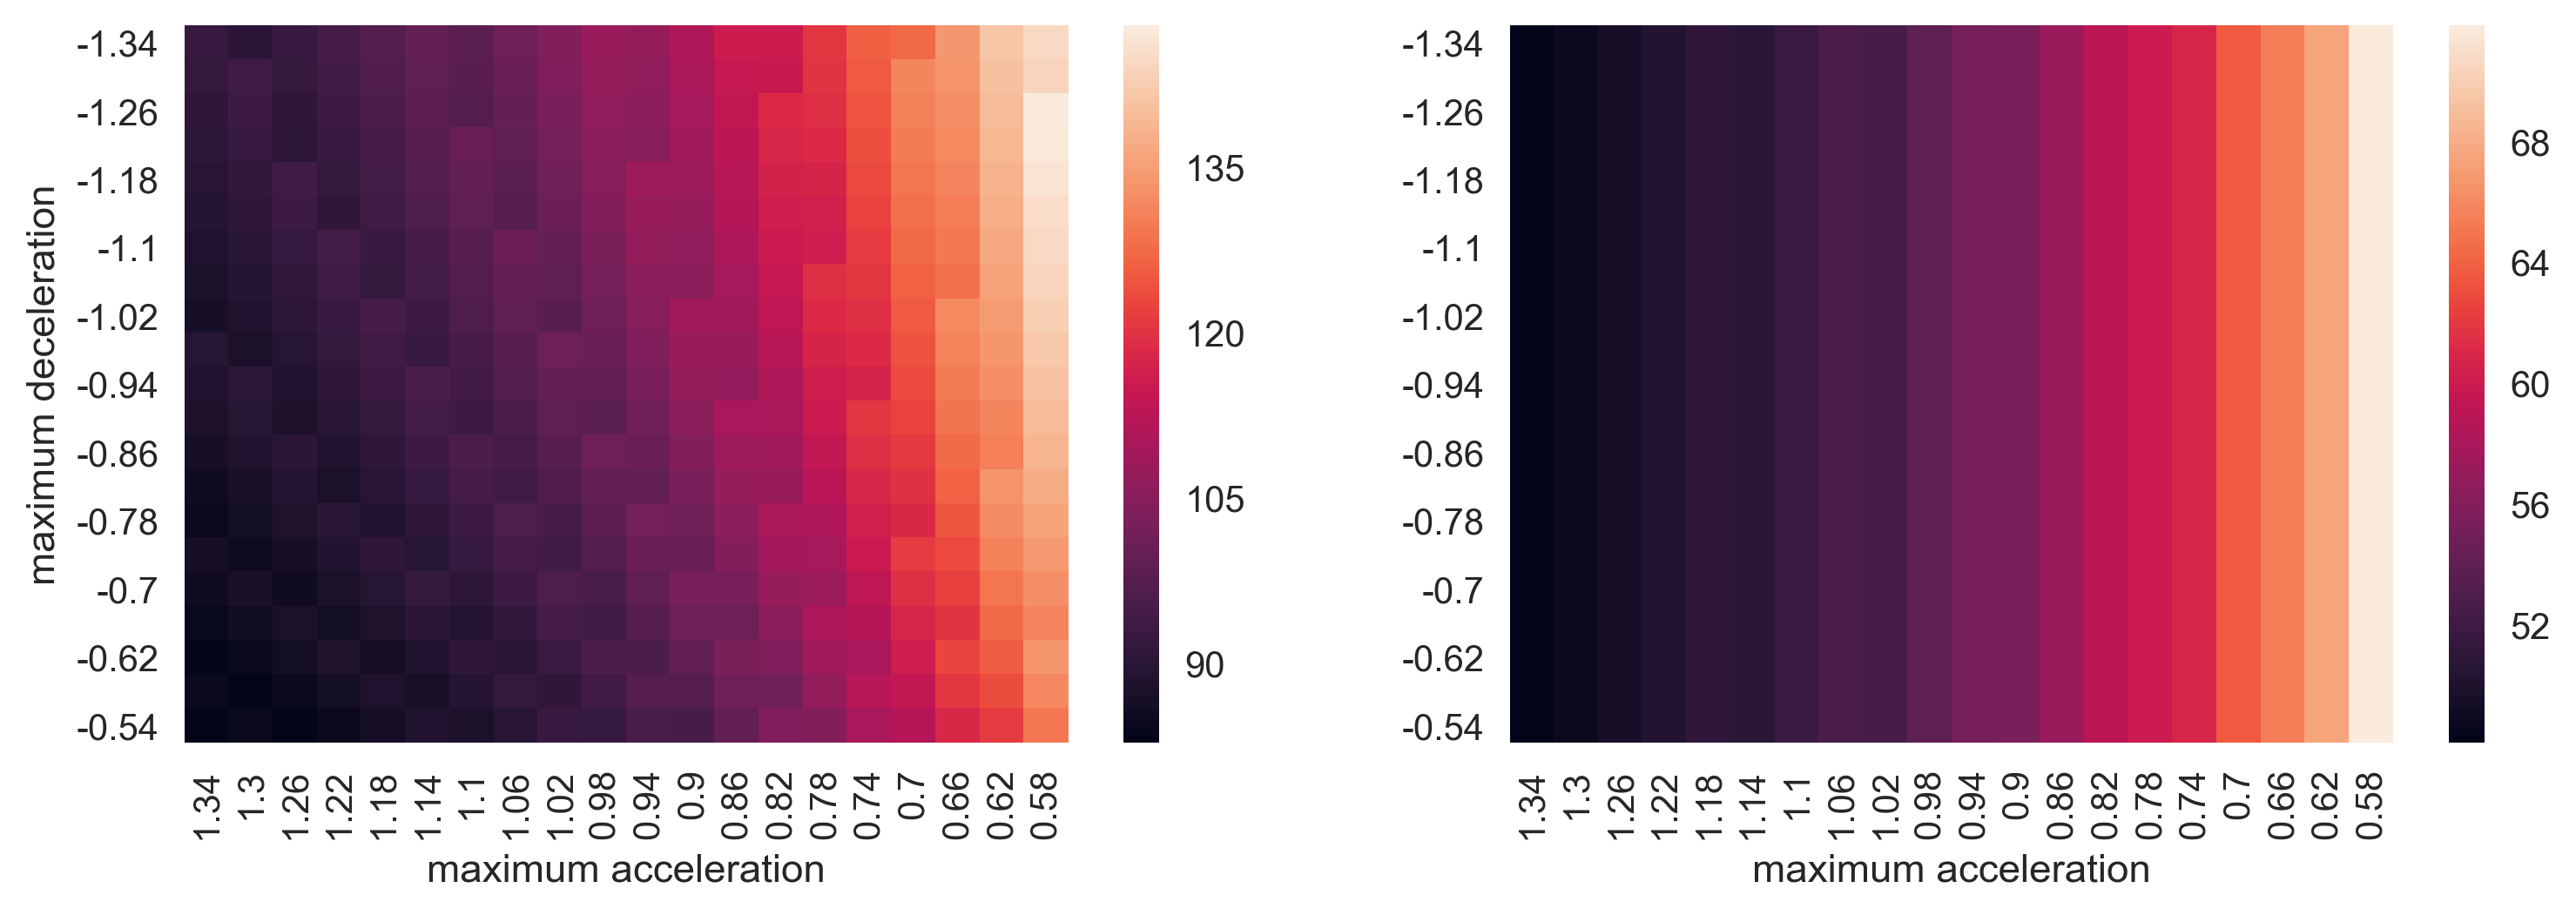

In [8]:
# maxvalue, minvalue =cal_max_min_two_df(av_avg_delay, cav_avg_delay) 
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
av_avg_delay.index.name = ylabel
av_avg_delay.columns.name = xlabel
sns.heatmap(av_avg_delay)
plt.subplot(2,2,2)
cav_avg_delay.columns.name = xlabel
sns.heatmap(cav_avg_delay)

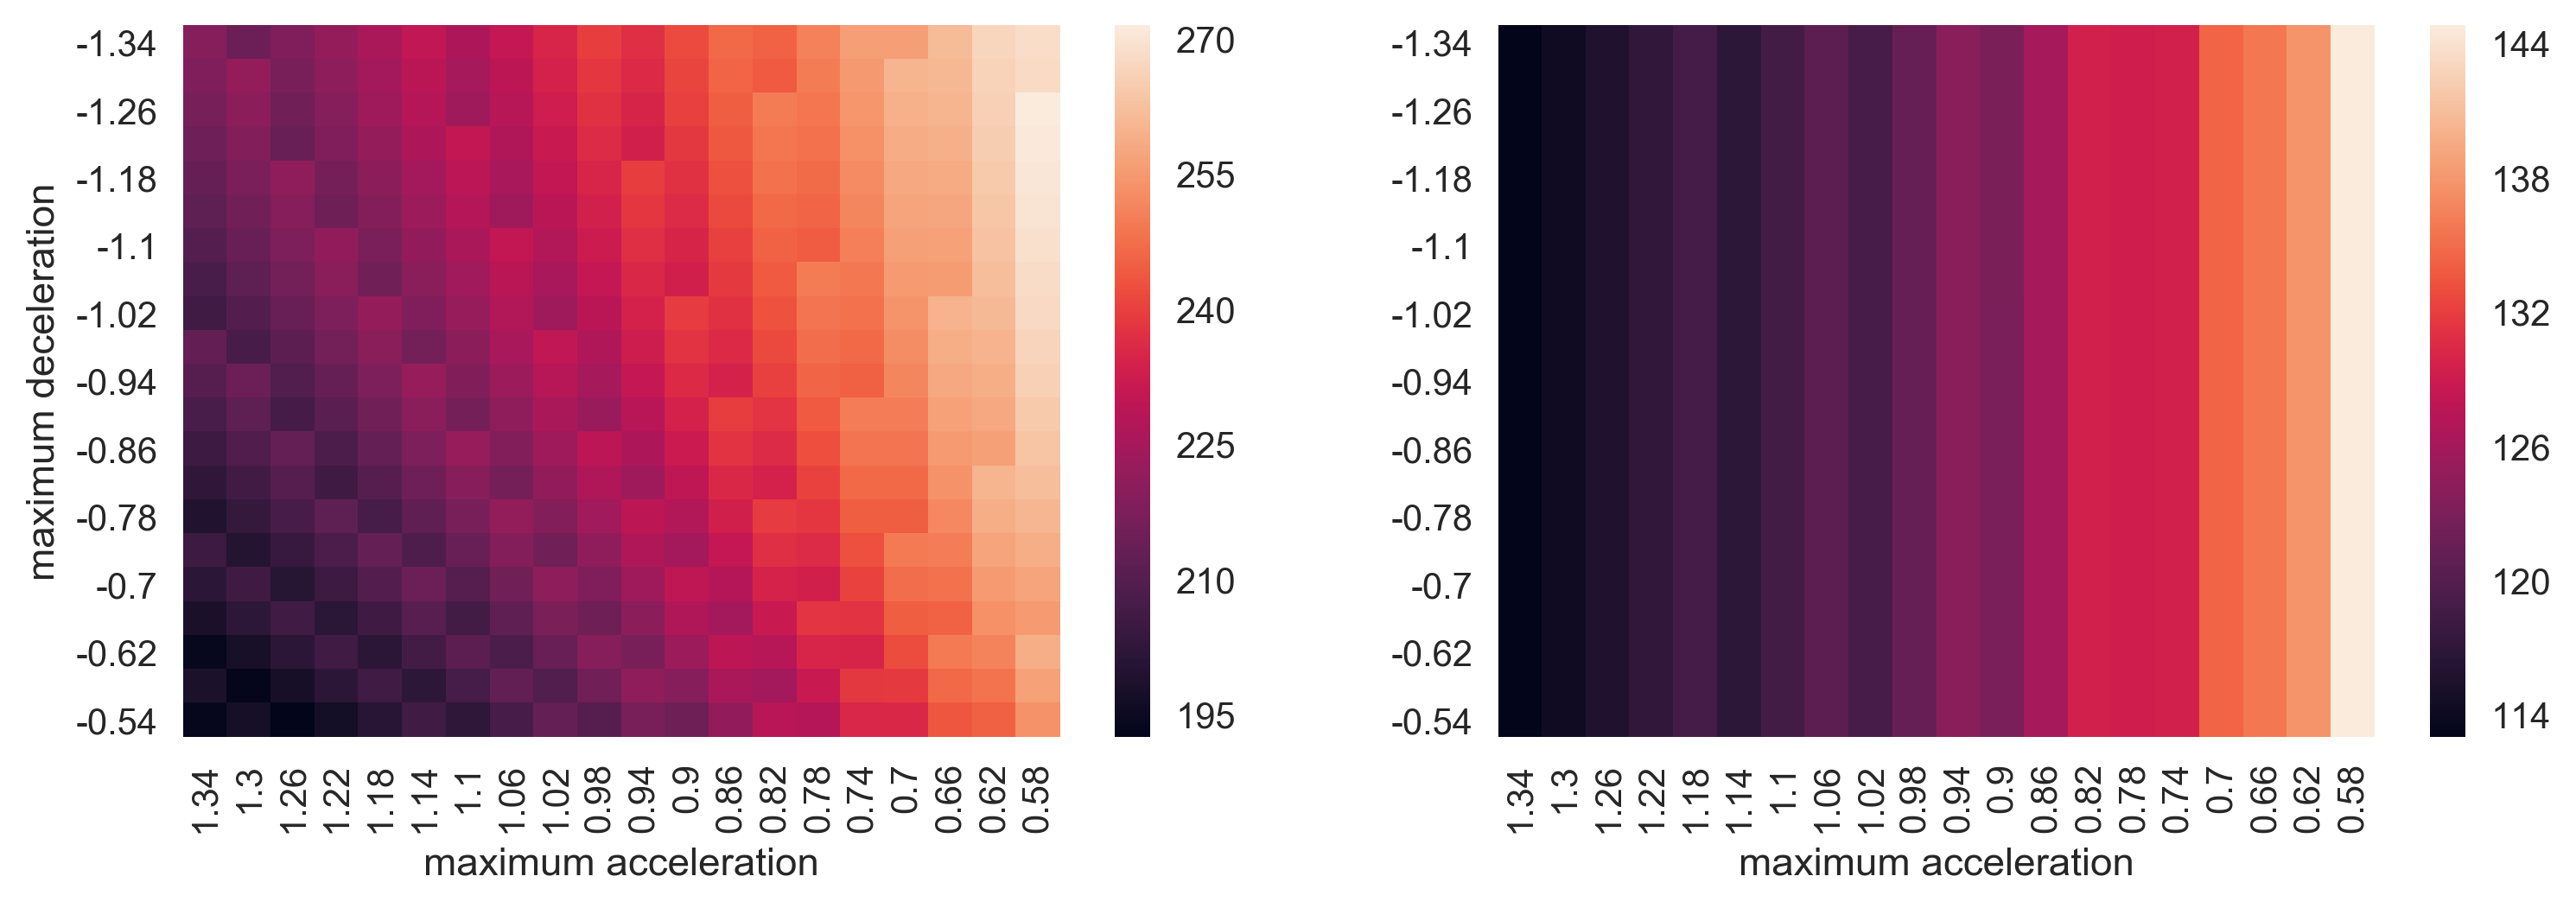

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
av_max_delay.index.name = ylabel
av_max_delay.columns.name = xlabel
sns.heatmap(av_max_delay)
plt.subplot(2,2,2)
cav_max_delay.columns.name = xlabel
sns.heatmap(cav_max_delay)

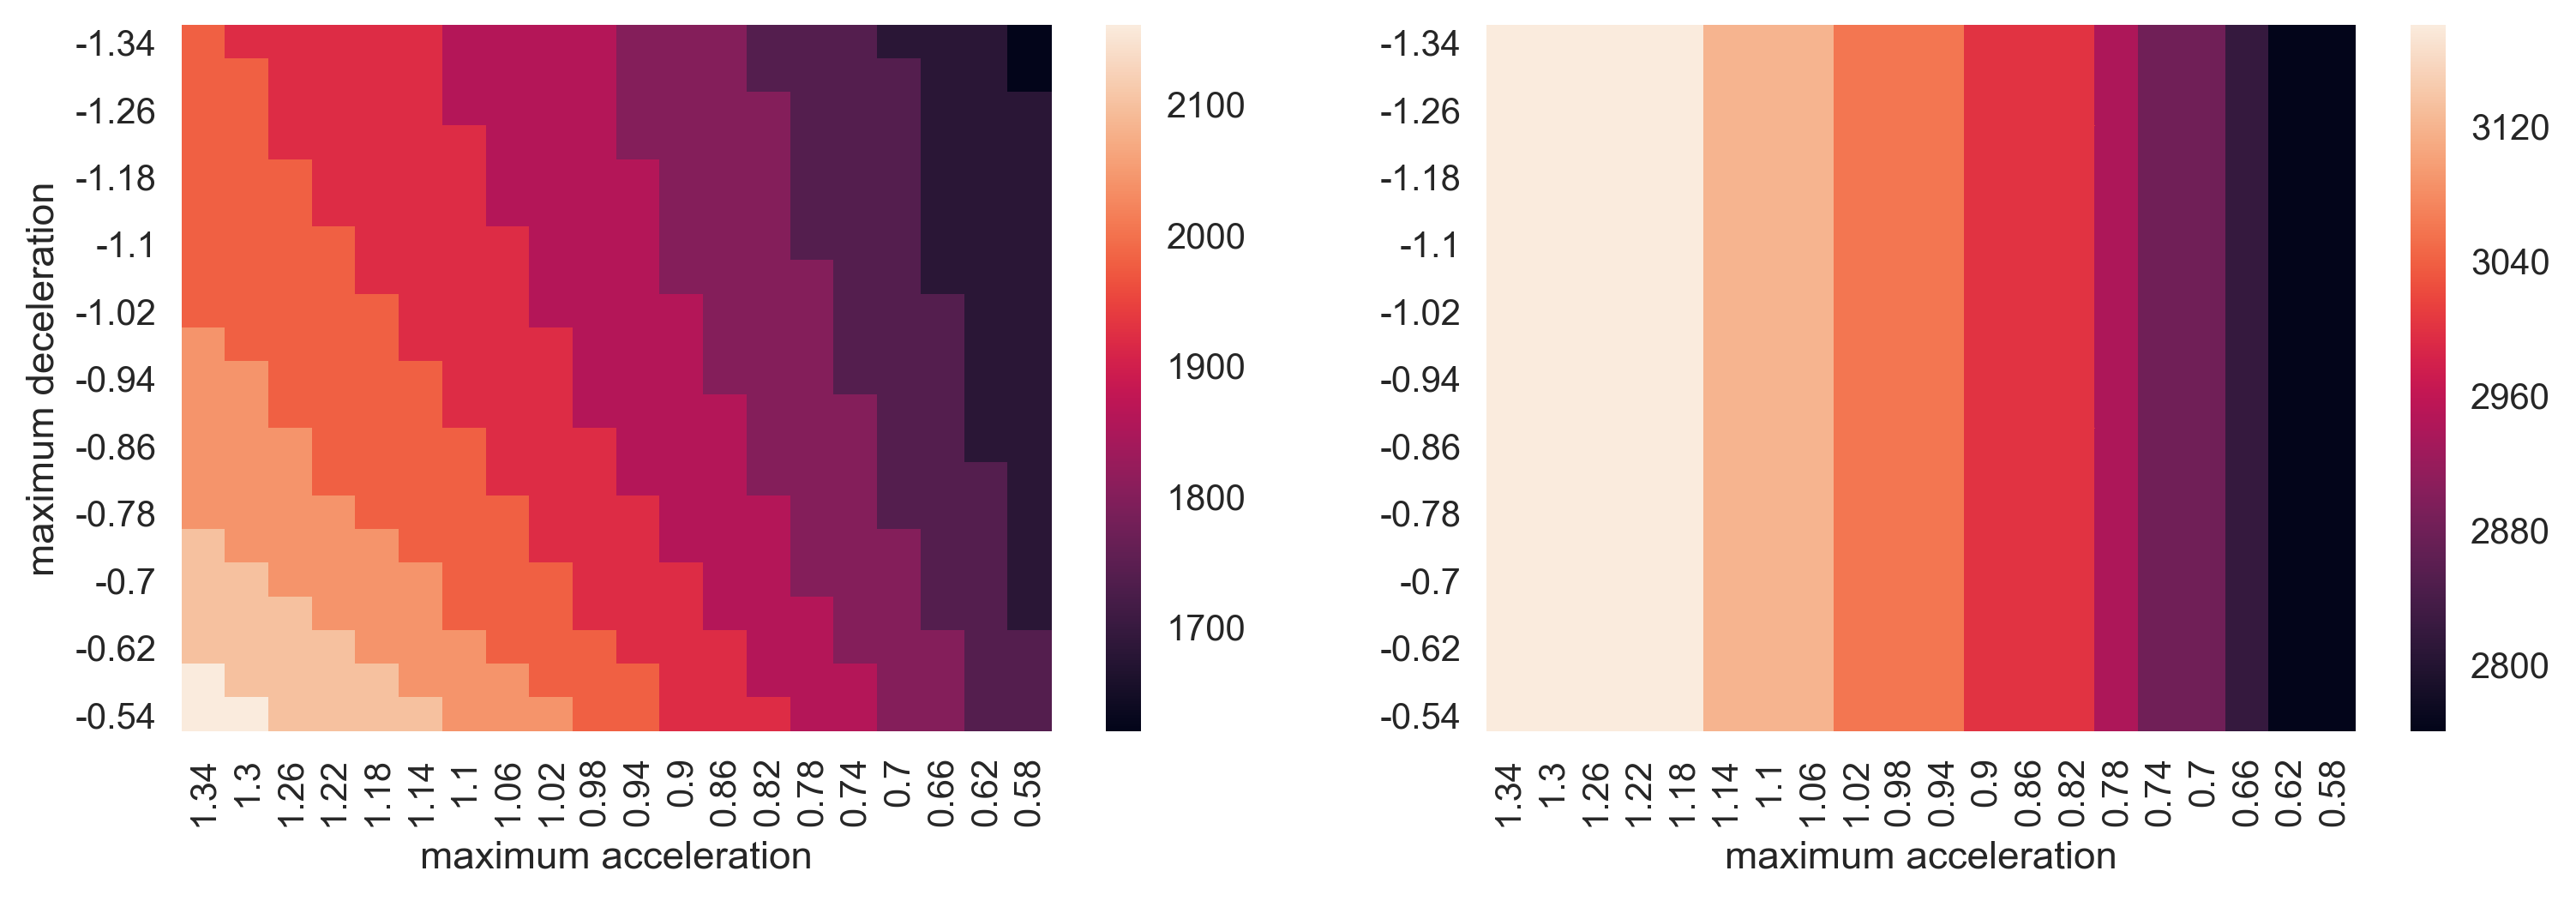

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
av_vdr.index.name = ylabel
av_vdr.columns.name = xlabel
sns.heatmap(av_vdr)
plt.subplot(2,2,2)
cav_vdr.columns.name = xlabel
sns.heatmap(cav_vdr)